In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics,preprocessing
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold

## Preprocessing: 
 - Loading and cleaning the Elections data into 8 different Dataframes:
 
 - feature Engineering. divide all parties from each dataframe into 5 classes: Arabs, Orthodox, Right, Left, Center
 
 -

In [2]:
knesset21elections = pd.read_excel(r"Knesset Elections\-21-.xlsx")
knesset21elections = knesset21elections.drop("מספר קלפי", axis=1)
knesset21elections = knesset21elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()


knesset20elections = pd.read_excel(r"Knesset Elections\-20-.xlsx")
knesset20elections = knesset20elections.drop("מספר קלפי", axis=1)
knesset20elections = knesset20elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()

knesset19elections = pd.read_excel(r"Knesset Elections\-19-.xlsx")
knesset19elections = knesset19elections.drop("מספר קלפי", axis=1)
knesset19elections = knesset19elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()

knesset18elections = pd.read_excel(r"Knesset Elections\-18-.xlsx")
knesset18elections = knesset18elections.drop("סמל קלפי", axis=1)
knesset18elections = knesset18elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()

knesset17elections = pd.read_excel(r"Knesset Elections\-17-2006.xls")
knesset17elections = knesset17elections.drop("מספר קלפי", axis=1)
knesset17elections = knesset17elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()


knesset16elections = pd.read_excel(r"Knesset Elections\-16-2003.xls")
knesset16elections = knesset16elections.drop("סמל קלפי", axis=1)
knesset16elections = knesset16elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()


knesset15elections = pd.read_excel(r"Knesset Elections\-15-1999-.xls")
knesset15elections = knesset15elections.drop("מס' רץ", axis=1).drop("קלפי", axis=1).drop("פיצול", axis=1).drop("נפה", axis=1)
knesset15elections = knesset15elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()


knesset14elections = pd.read_excel(r"Knesset Elections\-14-1996-.xls")
knesset14elections = knesset14elections.drop("סמל קלפי", axis=1).drop("כתובת", axis=1).drop("פיצול", axis=1)
knesset14elections = knesset14elections.groupby(by=["שם ישוב","סמל ישוב" ], axis=0).sum()

In [3]:
def totalSum(electionDataframe):
    return electionDataframe["Arabs"] + electionDataframe["Center"] + electionDataframe["Left"] + electionDataframe["Right"] + electionDataframe["Orthodox"]

def classified_summed_votes_list(electionsDataframe):
    return [electionsDataframe["Arabs"].sum(), electionsDataframe["Center"].sum(), electionsDataframe["Left"].sum(), electionsDataframe["Right"].sum(), electionsDataframe["Orthodox"].sum()]

def divideParties_into5classes(electionDataframe):
    arabs = []
    orthodox = []
    right = []
    left = []
    center = []
    
    if(electionDataframe.columns.contains("דעם")):
        arabs += ["דעם"]
    if(electionDataframe.columns.contains("ודעם")):
        arabs += ["ודעם"] 
    if(electionDataframe.columns.contains("עם")):
        arabs += ["עם"]
    if(electionDataframe.columns.contains("ום")):
        arabs += ["ום"]
    if(electionDataframe.columns.contains("ע")):
        arabs += ["ע"]
    if(electionDataframe.columns.contains("ו")):
        arabs += ["ו"]
    if(electionDataframe.columns.contains("ד")):
        arabs += ["ד"]
        
    if(electionDataframe.columns.contains("שס")):
        orthodox += ["שס"]
    if(electionDataframe.columns.contains("ג")):
        orthodox += ["ג"]

    if(electionDataframe.columns.contains("מחל")):
        right += ["מחל"]
    if(electionDataframe.columns.contains("ל")):
        right += ["ל"]
    if(electionDataframe.columns.contains("טב")):
        right += ["טב"]
    if(electionDataframe.columns.contains("כ")):
        right += ["כ"]
    if(electionDataframe.columns.contains("ט")):
        right += ["ט"]
    if(electionDataframe.columns.contains("ב")):
        right += ["ב"]        
    if(electionDataframe.columns.contains("יט")):
        right += ["יט"]        
           
    if(electionDataframe.columns.contains("אמת")):
        left += ["אמת"]
    if(electionDataframe.columns.contains("מרצ")):
        left += ["מרצ"]
    if(electionDataframe.columns.contains("מרץ")):
        left += ["מרץ"]
    if(electionDataframe.columns.contains("צפ")):
        left += ["צפ"]
    if(electionDataframe.columns.contains("ם")):
        left += ["ם"]
    if(electionDataframe.columns.contains("זך")):
        left += ["זך"]
                   
    if(electionDataframe.columns.contains("כן")):
        center += ["כן"]
    if(electionDataframe.columns.contains("פה")):
        center += ["פה"]
    if(electionDataframe.columns.contains("הד")):
        center += ["הד"]
    if(electionDataframe.columns.contains("יש")):
        center += ["יש"]
        
    electionDataframe["Arabs"] = 0
    for party_name in arabs:
        electionDataframe["Arabs"] += electionDataframe[party_name]
    
    electionDataframe["Left"] = 0
    for party_name in left:
        electionDataframe["Left"] += electionDataframe[party_name]
    
    electionDataframe["Right"] = 0
    for party_name in right:
        electionDataframe["Right"] += electionDataframe[party_name]
    
    electionDataframe["Center"] = 0
    for party_name in center:
        electionDataframe["Center"] += electionDataframe[party_name]
    
    electionDataframe["Orthodox"] = 0
    for party_name in orthodox:
        electionDataframe["Orthodox"] += electionDataframe[party_name]
    
    afterclassifiying = totalSum(electionDataframe)
    lost_votes = electionDataframe["כשרים"].sum() - afterclassifiying.sum() 
    print("lost votes: ",lost_votes)
    print(arabs,center,left,right,orthodox)
    cols_to_drop = np.arange(4,len(electionDataframe.columns)-5)
    
    return electionDataframe.drop(electionDataframe.columns[cols_to_drop], axis=1)

In [4]:

#=============  21 ====================

knesset21elections = divideParties_into5classes(knesset21elections)
# knesset21elections.to_csv("knesset21elections.csv", sep=',', encoding='utf-8')
# knesset21elections = pd.read_csv("knesset21elections.csv")
#=============  20 ====================

knesset20elections = divideParties_into5classes(knesset20elections)
# knesset20elections.to_csv("knesset20elections.csv", sep=',', encoding='utf-8')
# knesset20elections = pd.read_csv("knesset20elections.csv")
#============= 19 ===========================

knesset19elections = divideParties_into5classes(knesset19elections)
# knesset19elections.to_csv("knesset19elections.csv", sep=',', encoding='utf-8')
# knesset19elections = pd.read_csv("knesset19elections.csv")
#============= 18 ===========================

knesset18elections = divideParties_into5classes(knesset18elections)
# knesset18elections.to_csv("knesset18elections.csv", sep=',', encoding='utf-8')
# knesset18elections = pd.read_csv("knesset18elections.csv")
#============= 17 ===========================

knesset17elections = divideParties_into5classes(knesset17elections)
# knesset17elections.to_csv("knesset17elections.csv", sep=',', encoding='utf-8')
# knesset17elections = pd.read_csv("knesset17elections.csv")
#============= 16 ===========================

knesset16elections = divideParties_into5classes(knesset16elections)
# knesset16elections.to_csv("knesset16elections.csv", sep=',', encoding='utf-8')
# knesset16elections = pd.read_csv("knesset16elections.csv")
#============= 15 ===========================

knesset15elections = divideParties_into5classes(knesset15elections)
# knesset15elections.to_csv("knesset15elections.csv", sep=',', encoding='utf-8')
# knesset15elections = pd.read_csv("knesset15elections.csv")
#============= 14 ===========================

knesset14elections = divideParties_into5classes(knesset14elections)
# knesset14elections.to_csv("knesset14elections.csv", sep=',', encoding='utf-8')
# knesset14elections = pd.read_csv("knesset14elections.csv")

lost votes:  365800
['דעם', 'ום'] ['פה'] ['אמת', 'מרצ', 'זך'] ['מחל', 'ל', 'טב', 'כ'] ['שס', 'ג']
lost votes:  184974
['ודעם', 'ע'] ['פה'] ['אמת', 'מרצ', 'זך'] ['מחל', 'ל', 'טב', 'כ'] ['שס', 'ג']
lost votes:  262820
['עם', 'ו', 'ד'] ['כן', 'פה'] ['אמת', 'מרץ', 'צפ', 'זך'] ['מחל', 'טב'] ['שס', 'ג']
lost votes:  86333
['עם', 'ו', 'ד'] ['כן'] ['אמת', 'מרצ', 'זך'] ['מחל', 'ל', 'ט', 'ב'] ['שס', 'ג']
lost votes:  153189
['עם', 'ו', 'ד'] ['כן', 'יש'] ['אמת', 'מרצ', 'זך'] ['מחל', 'ל', 'טב', 'כ'] ['שס', 'ג']
lost votes:  128495.0
['עם', 'ו', 'ד'] ['כן', 'פה', 'יש'] ['אמת', 'מרצ', 'ם', 'זך'] ['מחל', 'ל', 'ט', 'ב'] ['שס', 'ג']
lost votes:  169639
['עם', 'ו', 'ד'] ['כן', 'פה', 'הד', 'יש'] ['אמת', 'מרצ', 'ם', 'זך'] ['מחל', 'ל', 'ב', 'יט'] ['שס', 'ג']
lost votes:  75757
['ע', 'ו', 'ד'] ['כן', 'הד'] ['אמת', 'מרץ'] ['מחל', 'ט', 'ב'] ['שס', 'ג']


## Exploratory Data Analysis: 

- charts, stats, and other conclusions

In [5]:
def ahuzey_hatzbaa(electionDF):
    return electionDF["מצביעים"].sum() / electionDF["בזב"].sum()
  

print("Total voting percentage in the 21st Knesset Elections: ", ahuzey_hatzbaa(knesset21elections))
print("Total voting percentage in the 20th Knesset Elections: ", ahuzey_hatzbaa(knesset20elections))
print("Total voting percentage in the 19th Knesset Elections: ", ahuzey_hatzbaa(knesset19elections))
print("Total voting percentage in the 18th Knesset Elections: ", ahuzey_hatzbaa(knesset18elections))
print("Total voting percentage in the 17th Knesset Elections: ", ahuzey_hatzbaa(knesset17elections))
print("Total voting percentage in the 16th Knesset Elections: ", ahuzey_hatzbaa(knesset16elections))
print("Total voting percentage in the 15th Knesset Elections: ", ahuzey_hatzbaa(knesset15elections))
print("Total voting percentage in the 14th Knesset Elections: ", ahuzey_hatzbaa(knesset14elections))

knesset21elections.head(20)


Total voting percentage in the 21st Knesset Elections:  0.6846117554867093
Total voting percentage in the 20th Knesset Elections:  0.7233862477761517
Total voting percentage in the 19th Knesset Elections:  0.6777171515926674
Total voting percentage in the 18th Knesset Elections:  0.625072632084281
Total voting percentage in the 17th Knesset Elections:  0.6359419866443241
Total voting percentage in the 16th Knesset Elections:  0.6561151253153973
Total voting percentage in the 15th Knesset Elections:  0.7616075951538815
Total voting percentage in the 14th Knesset Elections:  0.7579820758914384


,,בזב,מצביעים,פסולים,כשרים,Arabs,Left,Right,Center,Orthodox
שם ישוב,סמל ישוב,,,,,,,,,
אבו ג'ווייעד (שבט),967,1915,275,5,270,188,15,3,50,0
אבו גוש,472,4707,1915,72,1843,858,348,236,334,32
אבו סנאן,473,9234,4845,82,4763,2744,248,844,701,68
אבו עבדון (שבט),958,138,12,0,12,5,5,0,0,0
אבו קורינאת (שבט),968,2927,640,11,629,467,30,14,91,2
אבו קרינאת (יישוב),1342,543,213,4,209,106,15,4,78,2
אבו רובייעה (שבט),966,3919,761,8,753,587,55,11,64,4
אבו רוקייק (שבט),961,4691,1129,13,1116,1025,30,11,26,6
אבו תלול,1375,867,390,4,386,365,5,5,5,1


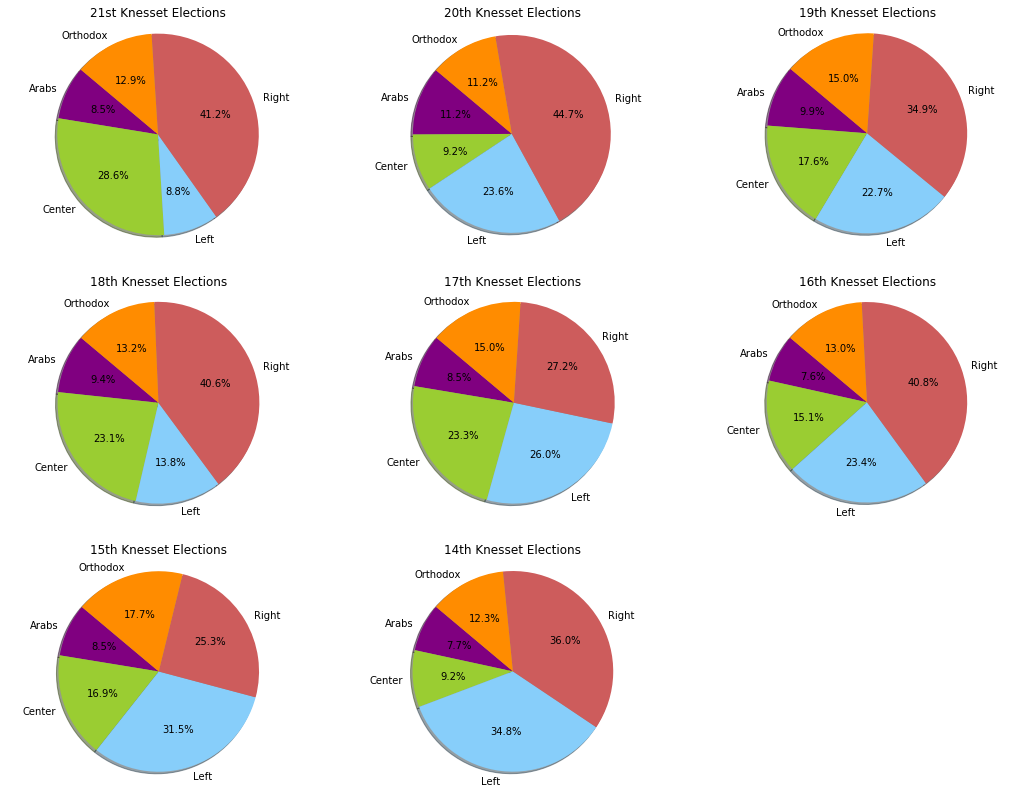

In [6]:
labels = "Arabs", "Center", "Left", "Right" , "Orthodox";
colors = ['purple', "yellowgreen" , "lightskyblue", 'indianred', "darkorange" ]

sizes21 = classified_summed_votes_list(knesset21elections)
sizes20 = classified_summed_votes_list(knesset20elections)
sizes19 = classified_summed_votes_list(knesset19elections)
sizes18 = classified_summed_votes_list(knesset18elections)
sizes17 = classified_summed_votes_list(knesset17elections)
sizes16 = classified_summed_votes_list(knesset16elections)
sizes15 = classified_summed_votes_list(knesset15elections)
sizes14 = classified_summed_votes_list(knesset14elections)
 
    
fig = plt.figure(figsize=(18,14))

# Plot 21st Elections
ax1 = plt.subplot(3,3,1)
ax1.pie(sizes21, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title('21st Knesset Elections')
ax1.axis('equal')

# Plot 20th Elections
ax2 = plt.subplot(3,3,2)
ax2.pie(sizes20, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax2.set_title('20th Knesset Elections')
ax2.axis('equal')

# Plot 19th Elections
ax3 = plt.subplot(3,3,3)
ax3.pie(sizes19, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax3.set_title('19th Knesset Elections')
ax3.axis('equal')

# Plot 18th Elections
ax4 = plt.subplot(3,3,4)
ax4.pie(sizes18, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax4.set_title('18th Knesset Elections')
ax4.axis('equal')

# Plot 17th Elections
ax4 = plt.subplot(3,3,5)
ax4.pie(sizes17, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax4.set_title('17th Knesset Elections')
ax4.axis('equal')

# Plot 16th Elections
ax4 = plt.subplot(3,3,6)
ax4.pie(sizes16, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax4.set_title('16th Knesset Elections')
ax4.axis('equal')

# Plot 15th Elections
ax4 = plt.subplot(3,3,7)
ax4.pie(sizes15, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax4.set_title('15th Knesset Elections')
ax4.axis('equal')

# Plot 14th Elections
ax4 = plt.subplot(3,3,8)
ax4.pie(sizes14, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax4.set_title('14th Knesset Elections')
ax4.axis('equal')
plt.show()

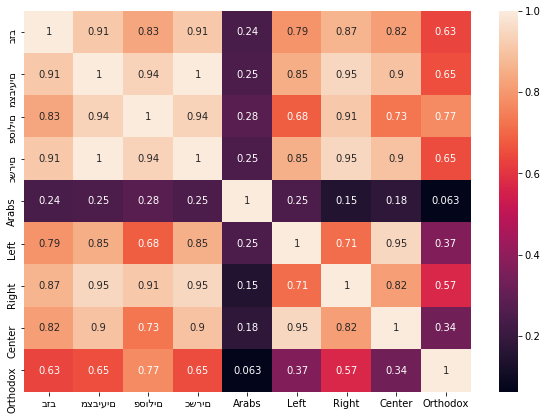

In [7]:
plt.figure(figsize = (10,7))
sb.heatmap(knesset21elections.corr(), annot=True);


Text(0.5,1,'Arab settlements, voting percentage to Arab parties:')

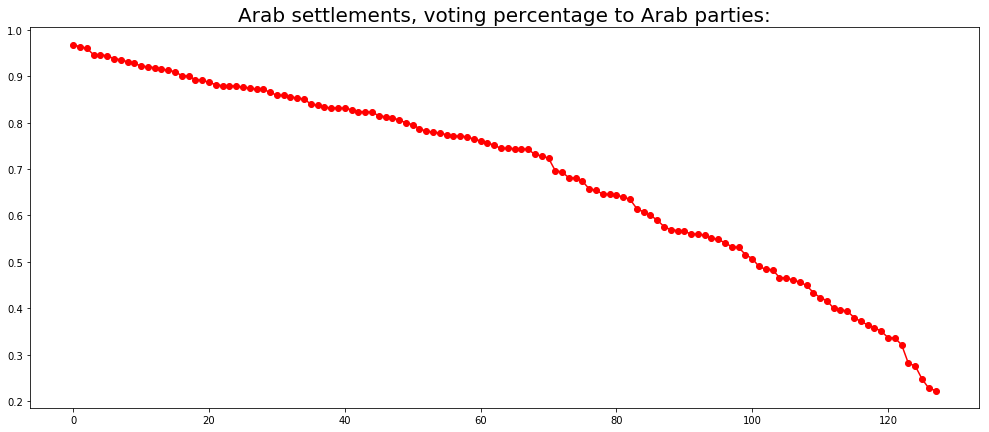

In [8]:

arab_settlements = knesset21elections[knesset21elections["Arabs"] / knesset21elections["כשרים"] > 0.21]
plt.figure(figsize=(17,7))
plt.plot((arab_settlements["Arabs"] / arab_settlements["כשרים"]).sort_values(ascending=False).values, "ro-")
plt.title("Arab settlements, voting percentage to Arab parties:", size=20)

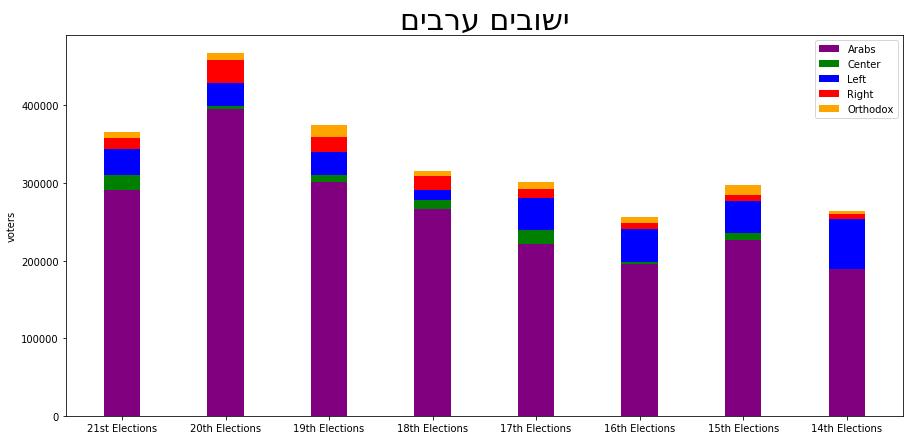

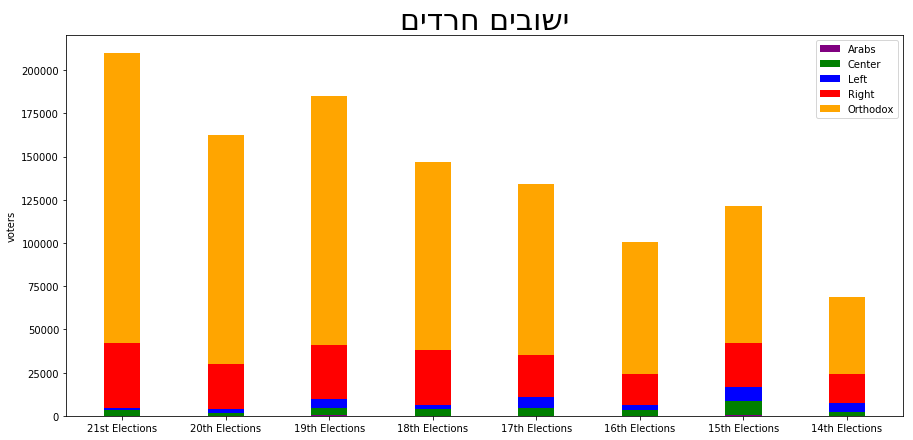

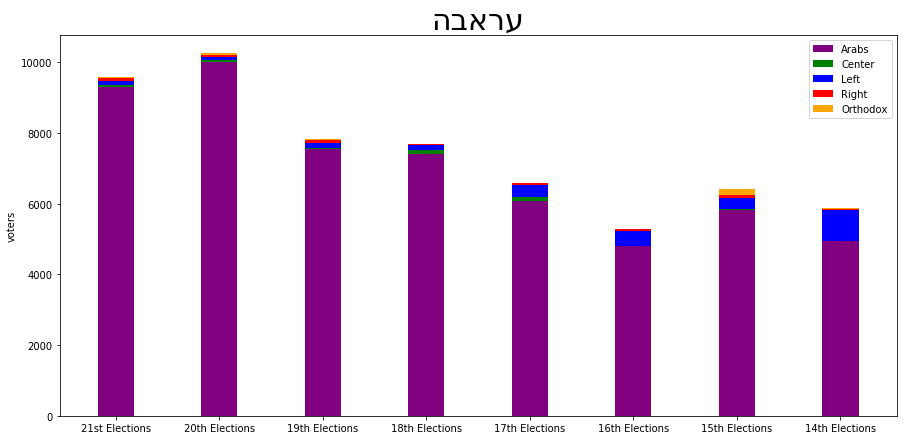

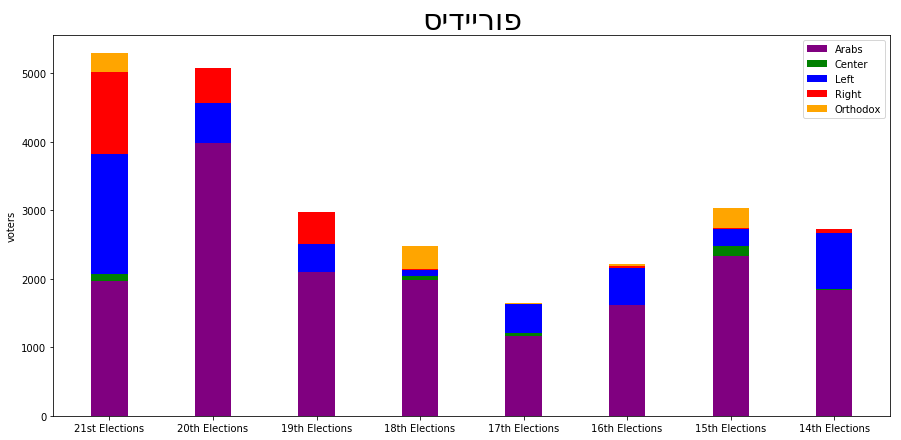

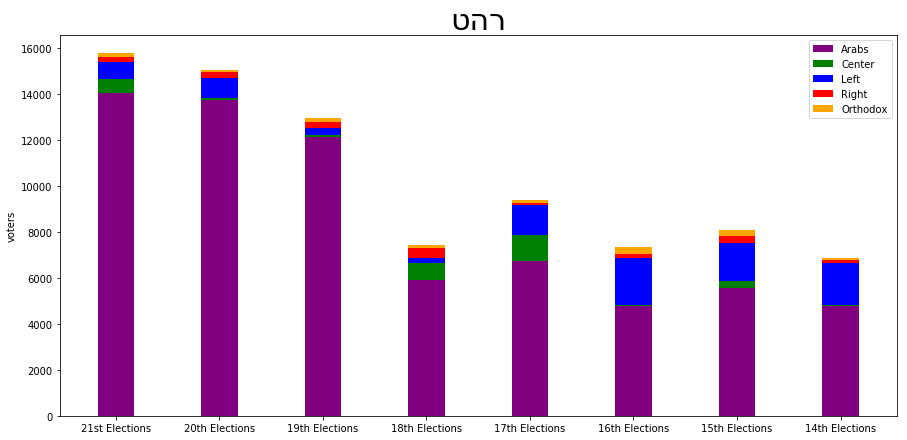

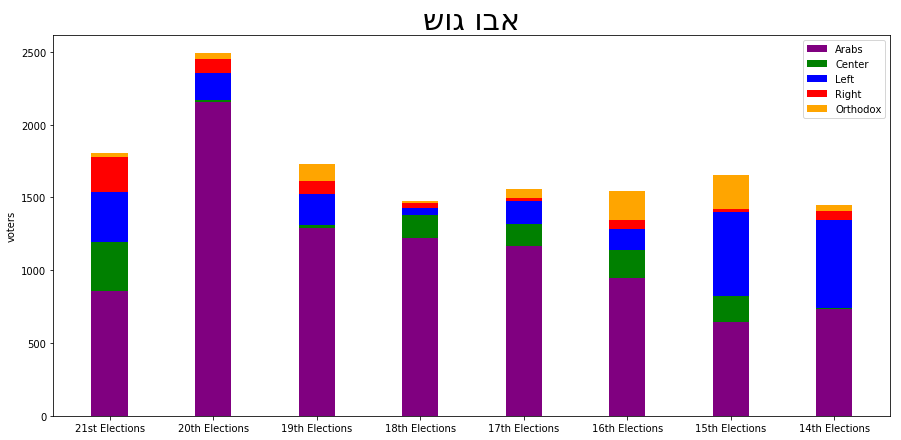

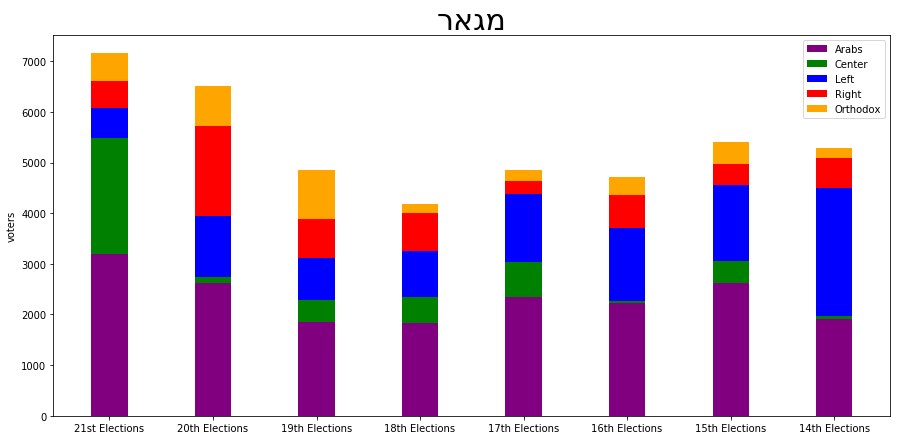

In [9]:
last_8_elections = [knesset21elections, knesset20elections, knesset19elections, knesset18elections, knesset17elections, knesset16elections, knesset15elections, knesset14elections]
elections = ["21st Elections", "20th Elections", "19th Elections", "18th Elections", "17th Elections", "16th Elections", "15th Elections", "14th Elections"]

def get_sizes_Orthodox(election, title):
    return election[election["Orthodox"] / election["כשרים"] > 0.4]
def get_sizes_Arabs(election, title):
    return election[election["Arabs"] / election["כשרים"] > 0.21]
def get_sizes_settlment(election, settlement_name):
    return  election.loc[settlement_name]

    
def print_all_elections_votes(sizes_func, t):

    sizes = np.zeros((5,len(last_8_elections)))
    i=0
    for election in last_8_elections:
        sizes[:,i] = classified_summed_votes_list(sizes_func(election, t))
        i+=1
        
    indx = np.arange(len(last_8_elections))    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    plt.figure(figsize=(15,7))

    p1 = plt.bar(indx, sizes[0], width, color="purple")
    p2 = plt.bar(indx, sizes[1], width, bottom=sizes[0], color="green")
    p3 = plt.bar(indx, sizes[2], width, bottom=sizes[0]+sizes[1], color="Blue")
    p4 = plt.bar(indx, sizes[3], width, bottom=sizes[0]+sizes[1]+sizes[2], color="Red")
    p5 = plt.bar(indx, sizes[4], width, bottom=sizes[0]+sizes[1]+sizes[2]+sizes[3], color="orange")

    plt.ylabel('voters')
    plt.title(t[::-1], size=30)
    plt.xticks(indx, elections)
    plt.legend(labels)
    plt.show()


print_all_elections_votes(get_sizes_Arabs,"ישובים ערבים")
print_all_elections_votes(get_sizes_Orthodox,"ישובים חרדים")



print_all_elections_votes(get_sizes_settlment,"עראבה") 
print_all_elections_votes(get_sizes_settlment, "פוריידיס")
print_all_elections_votes(get_sizes_settlment, "רהט")
print_all_elections_votes(get_sizes_settlment, "אבו גוש")
print_all_elections_votes(get_sizes_settlment, "מגאר")






תל אביב פסולים : 0.00444204691307502



ירושלים פסולים : 0.007836613850280233


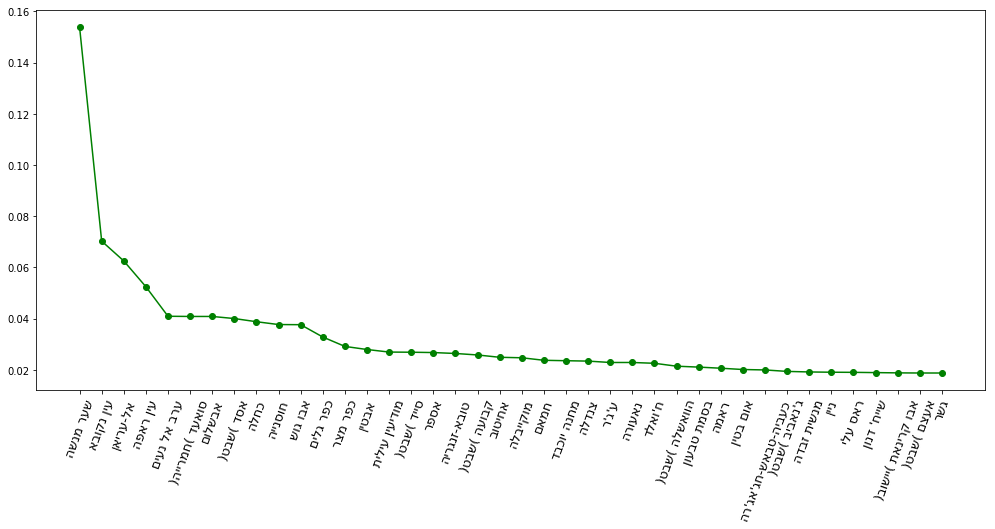

סמל ישוב
921    13
Name: מצביעים, dtype: int64

In [10]:
psulim_percentage = knesset21elections["פסולים"]/knesset21elections["מצביעים"]
#print(psulim_percentage.sort_values(ascending=False))
print("\n\n")
psulim_percentage = psulim_percentage.sort_values(ascending=False)

print("תל אביב פסולים :", float(psulim_percentage["תל אביב - יפו"]))
print("\n\n")
print("ירושלים פסולים :",float(psulim_percentage["ירושלים"]))


plt.figure(figsize=(17,7))
plt.plot(psulim_percentage.values[:40], "go-")

settlements = []
for name in psulim_percentage.index.get_level_values("שם ישוב"):
    name = name[::-1]
    settlements += [name]

plt.xticks(np.arange(0,40), settlements, rotation=70, size=13)
plt.show()

knesset21elections.loc["שער מנשה"]["מצביעים"]

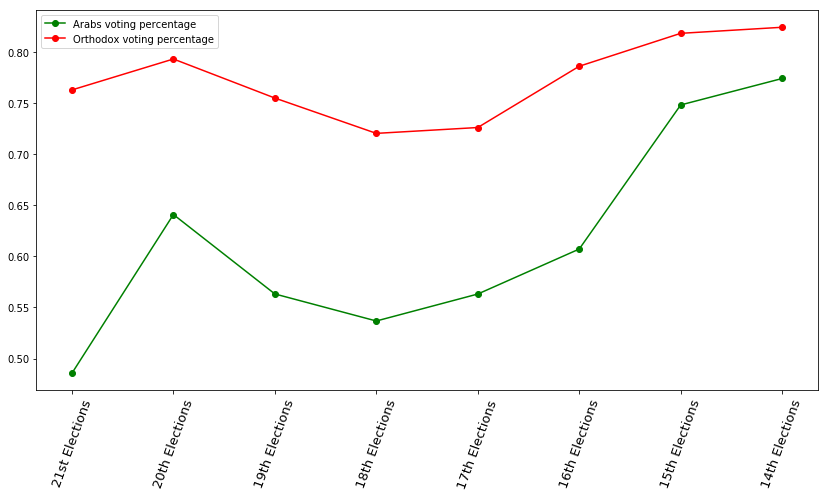

In [11]:

def plot_voting_percentage(population, percentage):
    settlements_voting = []
    for election in last_8_elections:
        settlements = election[election[population] / election["כשרים"] > percentage]
        settlements_voting += [settlements['מצביעים'].sum()/settlements['בזב'].sum()]
    return settlements_voting 


arabs_percentage = plot_voting_percentage("Arabs", 0.21)
orthodoxim_percentage = plot_voting_percentage("Orthodox", 0.4)

plt.figure(figsize=(14,7))
plt.plot(arabs_percentage, "go-", orthodoxim_percentage, "or-")
plt.xticks(np.arange(0,8), elections, rotation=70, size=13)
plt.legend(["Arabs voting percentage", "Orthodox voting percentage"])
plt.show()


## Algorithms:

- cluster the datasets with Kmeans
- visualize the data using dimention reduction with PCA
- Linear Regression Voting Percentage Prediction

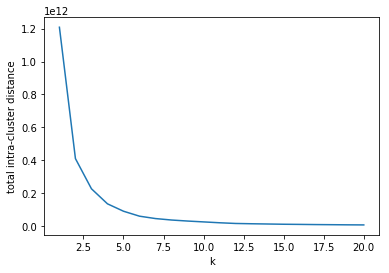

In [57]:
from sklearn.cluster import KMeans

ks = range(1,21)
scores = []

X = knesset21elections[["בזב","מצביעים", "Arabs", "Center", "Left", "Right", "Orthodox"]]

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(X)
    scores.append(-model.score(X))

plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')

plt.show()

# best K is around 5

model = KMeans(n_clusters=5)
y = model.fit_predict(X)


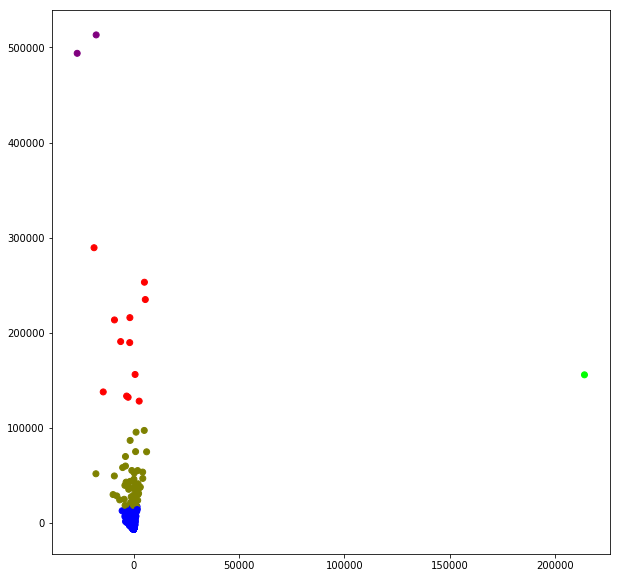

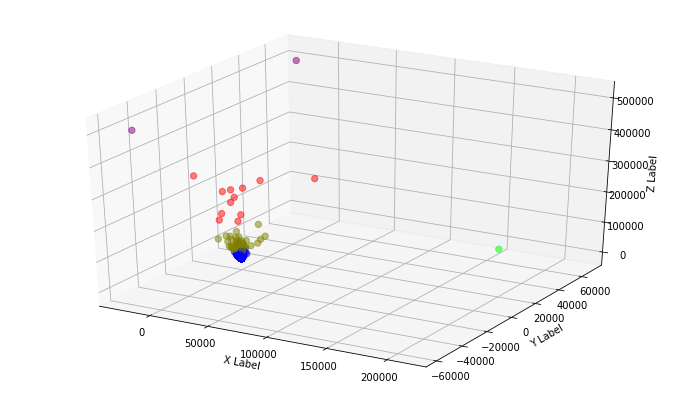

In [58]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


pca = PCA(n_components=2)
X_new = pca.fit_transform(X)  

plt.figure(figsize=(10,10))
plt.scatter(X_new[:,1], X_new[:,0], c=model.labels_.astype(float),cmap=plt.cm.brg)
plt.show()


pca = PCA(n_components=3)
X_new = pca.fit_transform(X)  

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_new[:,1], X_new[:,2], X_new[:,0],c=model.labels_.astype(float), cmap=plt.cm.brg, marker='o',s=40, alpha=0.5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [59]:
X[y==0]

,,בזב,מצביעים,Arabs,Center,Left,Right,Orthodox
שם ישוב,סמל ישוב,,,,,,,
אבו ג'ווייעד (שבט),967,1915,275,188,50,15,3,0
אבו גוש,472,4707,1915,858,334,348,236,32
אבו סנאן,473,9234,4845,2744,701,248,844,68
אבו עבדון (שבט),958,138,12,5,0,5,0,0
אבו קורינאת (שבט),968,2927,640,467,91,30,14,2
אבו קרינאת (יישוב),1342,543,213,106,78,15,4,2
אבו רובייעה (שבט),966,3919,761,587,64,55,11,4
אבו רוקייק (שבט),961,4691,1129,1025,26,30,11,6
אבו תלול,1375,867,390,365,5,5,5,1


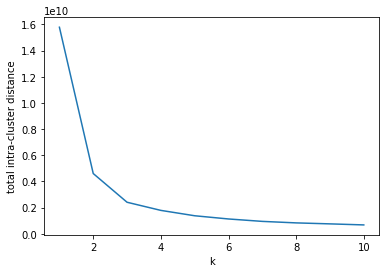

In [60]:
ks = range(1,11)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(X[y==0])
    scores.append(-model.score(X[y==0]))

plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')

plt.show()

# best K is around 4
X = X[y==0]
model = KMeans(n_clusters=4)
y = model.fit_predict(X)

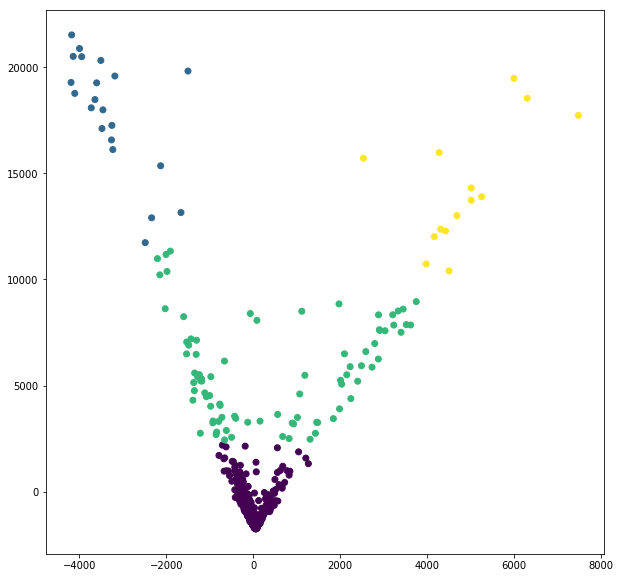

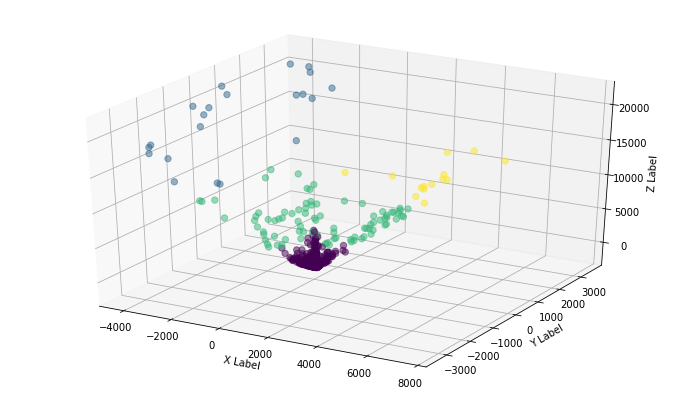

In [61]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)  

plt.figure(figsize=(10,10))
plt.scatter(X_new[:,1], X_new[:,0], c=model.labels_.astype(float))
plt.show()


#################################################

pca = PCA(n_components=3)
X_new = pca.fit_transform(X)  

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_new[:,1], X_new[:,2], X_new[:,0], c=model.labels_.astype(float), marker='o', s=40, alpha=0.5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


### with several PCA and Kmeans steps we've got interesting clustering of Israeli settlements:

In [64]:
# Medium population Arabic settlements:

X[y==3]

,,בזב,מצביעים,Arabs,Center,Left,Right,Orthodox
שם ישוב,סמל ישוב,,,,,,,
באקה אל-גרביה,6000,18635,7991,6549,305,772,94,39
ג'דיידה-מכר,1292,14098,6293,5319,127,312,63,66
טירה,2720,17873,10661,7325,270,2644,200,12
יפיע,499,12845,5741,4642,223,421,214,67
כפר כנא,509,14304,6919,5655,157,321,275,84
כפר מנדא,510,12249,7593,5981,76,450,218,724
כפר קאסם,634,14659,9472,5295,227,3664,88,18
כפר קרע,654,12611,5954,4805,139,656,83,74
מג'ד אל-כרום,516,10104,6170,5608,48,301,26,100


In [68]:
# Medium population Jewish settlements: // (also include Druze towns which voting habits are similar to Jewish towns - דאלית אל-כרמל)

X[y==1]

,,בזב,מצביעים,Arabs,Center,Left,Right,Orthodox
שם ישוב,סמל ישוב,,,,,,,
אור עקיבא,1020,15520,9773,4,1221,209,6650,921
אריאל,3570,15122,10096,6,1232,156,6861,160
באר יעקב,2530,15773,12021,10,4107,484,5548,751
בית שאן,9200,14180,9906,8,516,112,6365,1659
גבעת זאב,3730,11431,8734,3,802,173,3815,3030
גבעת שמואל,681,17890,13986,20,3187,707,6088,762
גדרה,2550,17315,12813,17,4475,932,5642,480
גן יבנה,166,16209,12259,8,3932,532,5892,540
גני תקווה,229,14043,11046,16,5048,1022,3154,953


### Socio-Economic Dataset, years 1999 - 2015:

In [19]:
 df15 = pd.read_excel("socioeconomic/2015.xls")
df15['CITY'] = df15['CITY'].str.strip()

df13 = pd.read_excel("socioeconomic/2013.xls")
df13['CITY'] = df13['CITY'].str.strip()

df08 = pd.read_excel("socioeconomic/2008.xls")
df08['CITY'] = df08['CITY'].str.strip()

df06 = pd.read_excel("socioeconomic/2006.xls")
df06['CITY'] = df06['CITY'].str.strip()

df01 = pd.read_excel("socioeconomic/2001.xls")
df01['CITY'] = df01['CITY'].str.strip()

df99 = pd.read_excel("socioeconomic/1999.xls")
df99['CITY'] = df99['CITY'].str.strip()

In [20]:
#Cleaning the data
df15 = df15.replace('..', 0).replace(',','').set_index('CITY')
df15 = df15.dropna(thresh=5) 
df15 = df15.round()
del df15['SYMBOL']

df13 = df13.replace('..', 0).replace(',','').set_index('CITY')
df13 = df13.dropna(thresh=5) 
df13 = df13.round(0)
del df13['SYMBOL']

df08 = df08.replace('..', 0).replace(',','').set_index('CITY')
df08 = df08.dropna(thresh=5) 
df08 = df08.round(0)
del df08['SYMBOL']

df06 = df06.replace('..', 0).replace(',','').set_index('CITY')
df06 = df06.dropna(thresh=5) 
df06 = df06.round(0)
del df06['SYMBOL']

df01 = df01.replace('..', 0).replace(',','').set_index('CITY')
df01 = df01.dropna(thresh=5) 
df01 = df01.round(0)

df99 = df99.replace('..', np.nan).set_index('CITY')
df99 = df99.dropna(thresh=2) 
df99 = df99.round()

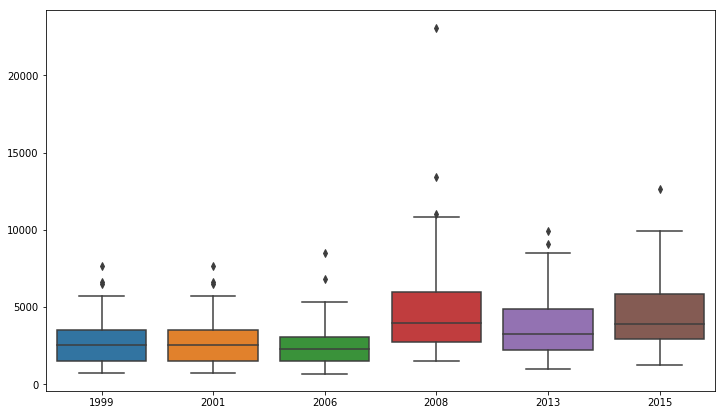

In [21]:
result = pd.concat([df99['AVERAGE INCOME'], df01['AVERAGE INCOME']], axis=1, join_axes=[df01.index])
result = pd.concat([result, df06['AVERAGE INCOME']], axis=1, join_axes=[df01.index])
result = pd.concat([result, df08['AVERAGE INCOME']], axis=1, join_axes=[df01.index])
result = pd.concat([result, df13['AVERAGE INCOME']], axis=1, join_axes=[df01.index])
result = pd.concat([result, df15['AVERAGE INCOME']], axis=1, join_axes=[df01.index])
result.columns = ['1999','2001','2006','2008','2013','2015']

plt.figure(figsize = (12,7))
sb.boxplot(data=result);

#### As it is possible to see above, the gaps between rich and poor are bigger during the last 10 years then before. is it a symbol for the political map?

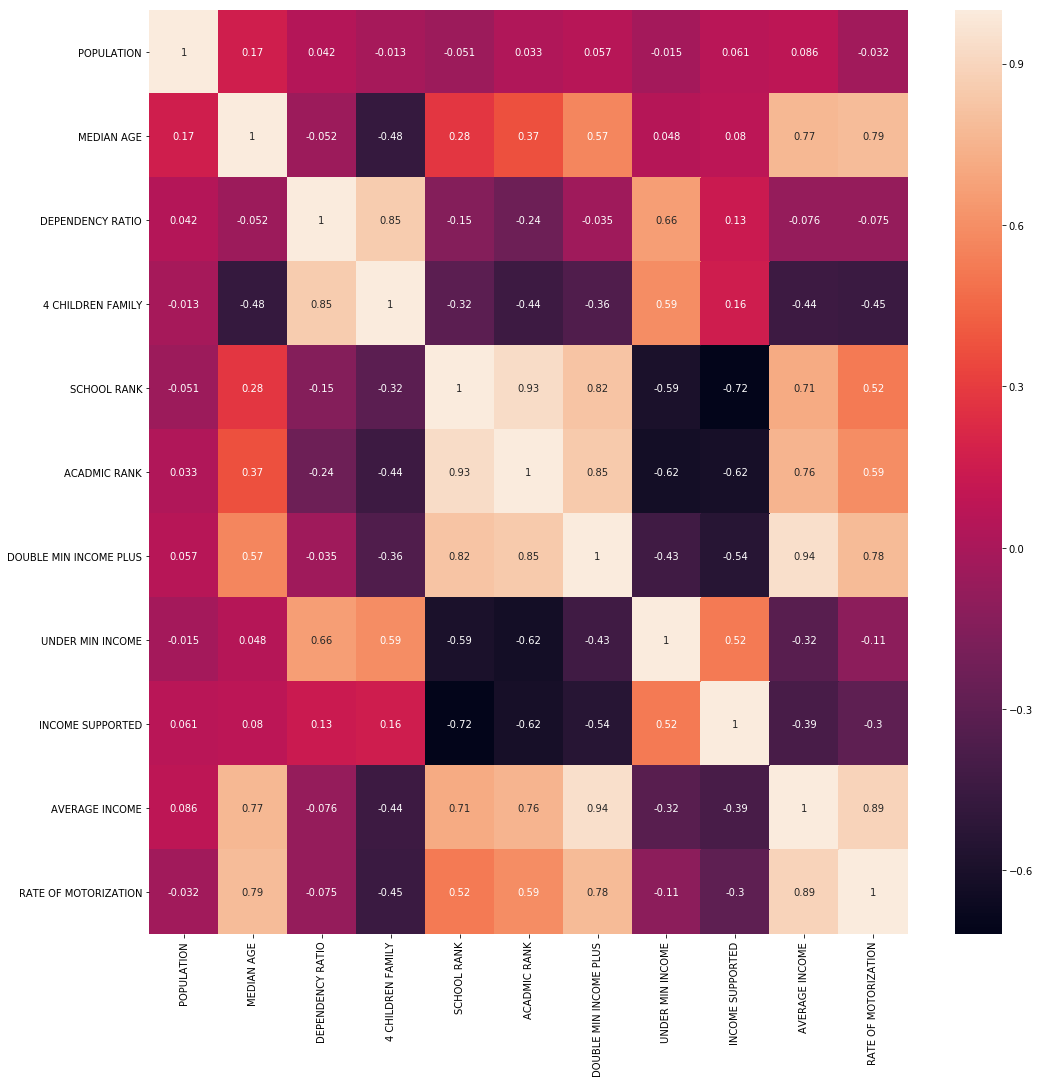

In [22]:
plt.figure(figsize = (17,17))
sb.heatmap(df15.corr(), annot=True);

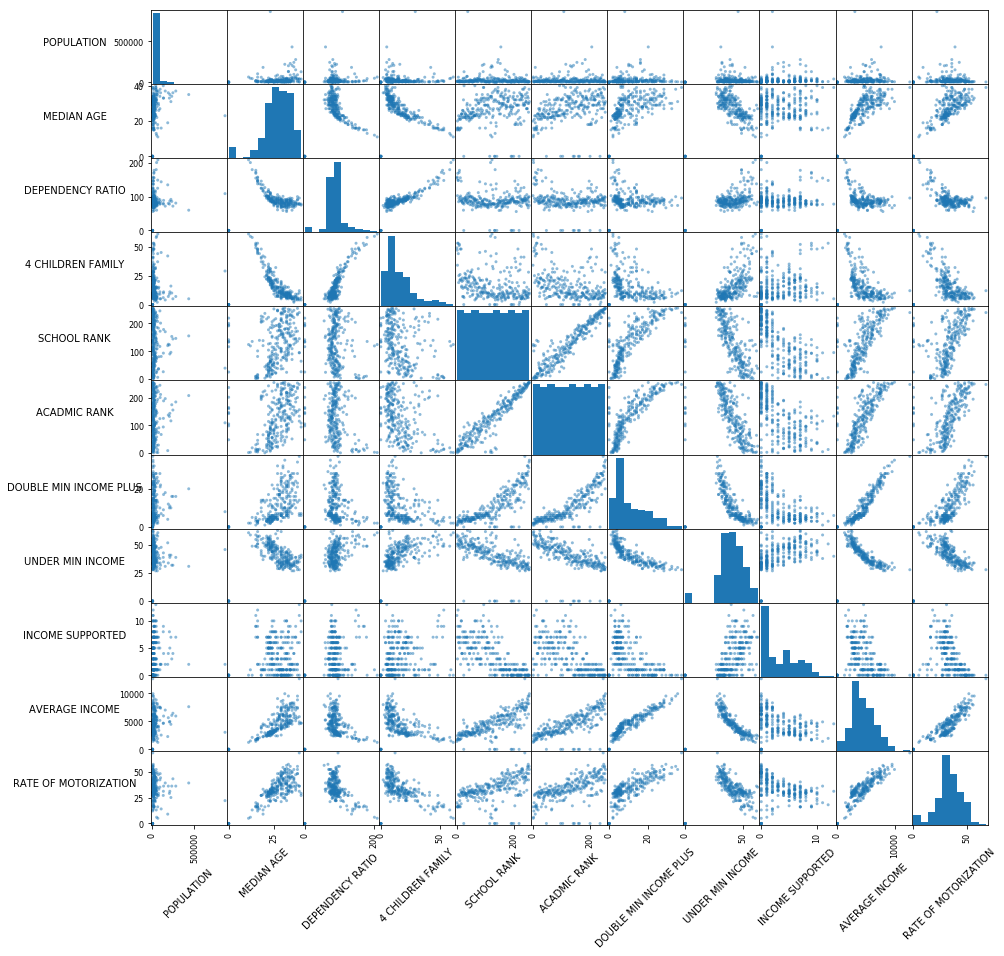

In [23]:
sm = pd.plotting.scatter_matrix(df15,figsize=(15,15));
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
plt.show()

In [24]:
#Combine  the election data with the Socio-Economic data

kn15 = pd.read_csv("KE/knesset20elections.csv", index_col=0, encoding="utf-8")
kn15.columns = kn15.columns.str.replace(' ', '')
df15_labeled = pd.merge(df15, kn15[['Arabs','Left','Right','Center','Orthodox']],left_index=True, right_index=True)

kn13 = pd.read_csv("KE/knesset19elections.csv", index_col=0, encoding="utf-8")
kn13.columns = kn13.columns.str.replace(' ', '')
df13_labeled = pd.merge(df13, kn13[['Arabs','Left','Right','Center','Orthodox']],left_index=True, right_index=True)

kn08 = pd.read_csv("KE/knesset18elections.csv", index_col=0, encoding="utf-8")
kn08.columns = kn08.columns.str.replace(' ', '')
df08_labeled = pd.merge(df08, kn08[['Arabs','Left','Right','Center','Orthodox']],left_index=True, right_index=True)

kn06 = pd.read_csv("KE/knesset17elections.csv", index_col=0, encoding="utf-8")
kn06.columns = kn06.columns.str.replace(' ', '')
df06_labeled = pd.merge(df06, kn06[['Arabs','Left','Right','Center','Orthodox']],left_index=True, right_index=True)

kn01 = pd.read_csv("KE/knesset16elections.csv", index_col=0, encoding="utf-8")
kn01.columns = kn01.columns.str.replace(' ', '')
df01_labeled = pd.merge(df01, kn01[['Arabs','Left','Right','Center','Orthodox']],left_index=True, right_index=True)

kn99 = pd.read_csv("KE/knesset15elections.csv", index_col=0, encoding="utf-8")
kn99.columns = kn99.columns.str.replace(' ', '')
df99_labeled = pd.merge(df99, kn99[['Arabs','Left','Right','Center','Orthodox']],left_index=True, right_index=True)

In [25]:
train_df = pd.DataFrame()
train_df = train_df.append(df15_labeled, sort=False)
train_df = train_df.append(df13_labeled, sort=False)
train_df = train_df.append(df08_labeled, sort=False)
train_df = train_df.append(df06_labeled, sort=False)
train_df = train_df.append(df01_labeled, sort=False)
train_df = train_df.append(df99_labeled, sort=False)


X_train = train_df[['MEDIAN AGE','DEPENDENCY RATIO','4 CHILDREN FAMILY','RATE OF MOTORIZATION','AVERAGE INCOME','ACADMIC RANK','SCHOOL RANK','UNDER MIN INCOME','DOUBLE MIN INCOME PLUS']]
X_test = df15_labeled[['MEDIAN AGE','DEPENDENCY RATIO','4 CHILDREN FAMILY','RATE OF MOTORIZATION','AVERAGE INCOME','ACADMIC RANK','SCHOOL RANK','UNDER MIN INCOME','DOUBLE MIN INCOME PLUS']]


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Training Linear regression models:

In [26]:
def predict_voting_Regression_models(voting_group):
    
    y_train = train_df[voting_group]/(train_df['Right']+train_df['Left']+train_df['Center']+train_df['Arabs']+train_df['Orthodox'])
    y_test = df15_labeled[voting_group]/(df15_labeled['Right']+df15_labeled['Left']+df15_labeled['Center']+df15_labeled['Arabs']+df15_labeled['Orthodox'])

    R2_scores = []
    model = linear_model.LinearRegression(n_jobs = -1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    R2_scores += [metrics.r2_score(y_test, y_pred)]

    for i in range(2,10):
        poly = PolynomialFeatures(degree=i)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.fit_transform(X_test)
        model.fit(X_poly_train, y_train)
        y_pred = model.predict(X_poly_test)

        R2_scores += [metrics.r2_score(y_test, y_pred)]

    plt.plot(np.arange(1,10), R2_scores)
     
    # Plotting the best chosen Model Testing data (2015 year):     
    
    poly = PolynomialFeatures(degree=(np.argmax(R2_scores)+1))
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)
    model.fit(X_poly_train, y_train)
    y_pred = model.predict(X_poly_test)

    fig = plt.figure(figsize = (8,8))
    ax = plt.subplot(1,1,1)
    ax.scatter(y_test, y_pred,edgecolors=(0,0,0),c='b')
    ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
    ax.set_xlabel('true values')
    ax.set_ylabel('prediction')
    ax.set_title('Test data for %s, R Sqared score is: %1.3f' %(voting_group, max(R2_scores)))
    plt.show()

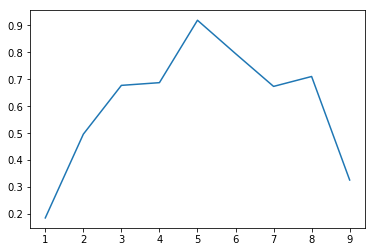

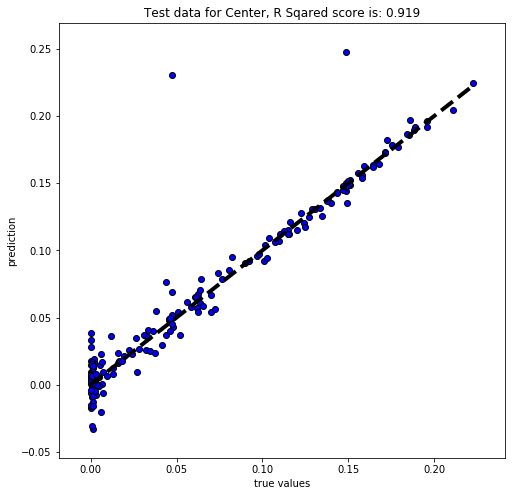

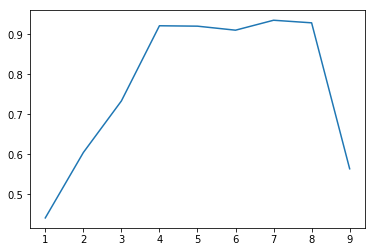

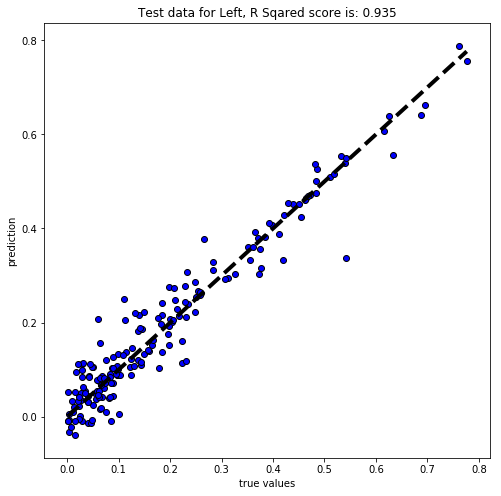

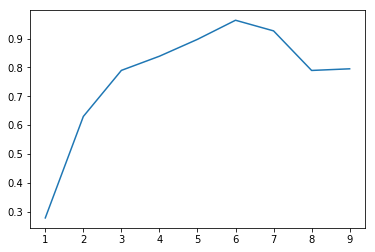

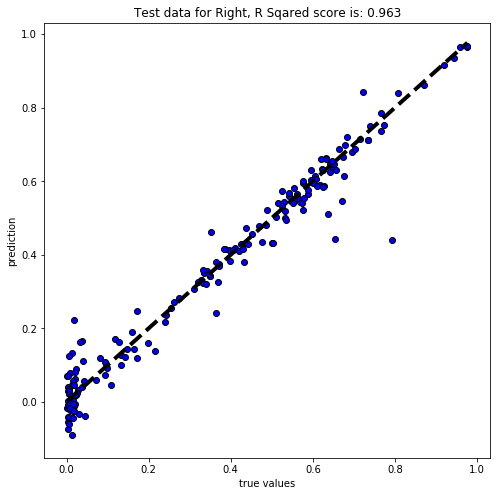

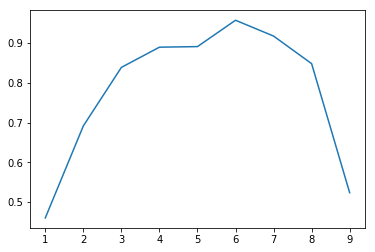

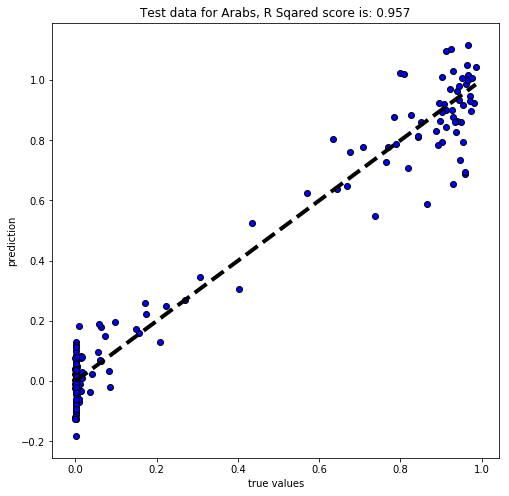

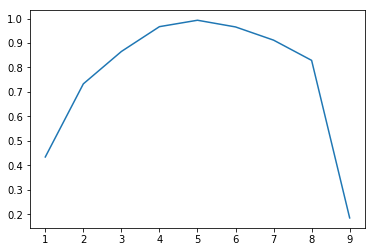

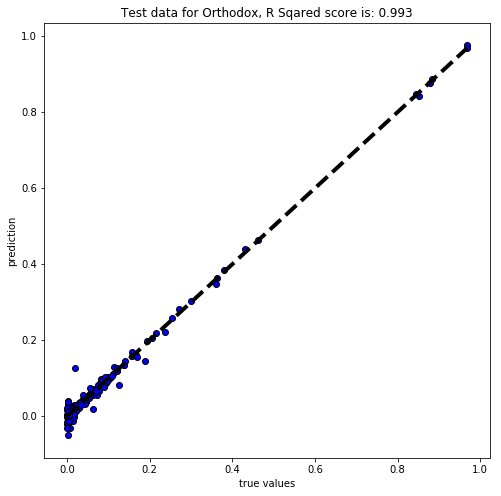

In [27]:
predict_voting_Regression_models("Center")
predict_voting_Regression_models("Left")
predict_voting_Regression_models("Right")
predict_voting_Regression_models("Arabs")
predict_voting_Regression_models("Orthodox")